# **Servo Prediction using Linear Regression**

-------------

## **Objective**

1. Data Exploration and Preprocessing:
2. Model Building:
3. Model Evaluation:
4. Prediction and Visualization:

## **Data Source**

https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Servo%20Mechanism.csv

## **Import Library**

In [1]:
import pandas as pd
import numpy as np

## **Import CSV as DataFrame**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Servo%20Mechanism.csv')

## **Get the First Five Rows of Dataframe**

In [3]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# **Get Information of DataFrame**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


## **Get the Summary Statistics**

In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


## **Get Column Names**

In [ ]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

## **Get Shape of DataFrame**

In [ ]:
df.shape

(167, 5)

## **Get categories and Counts of Categorial Variables**

In [ ]:
df[['Motor']].value_counts()

,count
Motor,
C,40
A,36
B,36
E,33
D,22


In [ ]:
df[['Screw']].value_counts()

,count
Screw,
A,42
B,35
C,31
D,30
E,29


## **Get Encoding of Categorical Features**

In [ ]:
df.replace({'Motor': {'A': 0, 'B': 1 , 'C': 2 , 'D': 3 , 'E' : 4}}, inplace=True)

<ipython-input-52-171bc57ea03f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Motor': {'A': 0, 'B': 1 , 'C': 2 , 'D': 3 , 'E' : 4}}, inplace=True)


In [ ]:
df.replace({'Screw': {'A': 0, 'B': 1 , 'C': 2 , 'D': 3 , 'E' : 4}}, inplace=True)

<ipython-input-53-cb2a18b3b2b2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Screw': {'A': 0, 'B': 1 , 'C': 2 , 'D': 3 , 'E' : 4}}, inplace=True)


## **Define y (dependent or label or target variable) and X (independent or features or attribute variable)**

In [ ]:
y = df['Class']

In [ ]:
y.shape

(167,)

In [ ]:
y

,Class
0,4
1,11
2,6
3,48
4,6
...,...
162,44
163,40
164,25
165,44


In [ ]:
X = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [ ]:
X.shape

(167, 4)

In [ ]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


## **Get Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=2529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50, 4), (117, 4), (50,), (117,))

## **Get Model Train**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

# **Get Model Prediction**

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred.shape

(117,)

In [ ]:
y_pred

array([ 24.89015109,  28.08391972,  17.55257369,  19.57157488,
        37.1210723 ,  23.02101376,  11.31490029,  17.33873833,
        38.79851087,  39.51501737,  12.99233887,  22.61547965,
        15.87513511,  11.6564629 ,  19.26060249,  16.93320422,
        -4.46259683,  29.92246682,  31.59990539,  -3.35180088,
        30.72229038,  30.8833989 ,  32.80526306,  27.12298763,
        14.53925915,   6.09088581,  27.33682299,  14.70036767,
        21.65454756,   3.45251515,  29.01426157,  22.77658817,
        34.23827605,  28.80042621,   8.30158575,   3.20808956,
        17.8941363 ,  29.76135829,  12.61739498,  36.16014022,
        27.52852175,  19.01617691,   7.34065367,   5.66321509,
        30.1668924 ,  28.24502824,  32.56083747,   4.16902164,
        20.69361548,  18.05524482,  24.45402675,   7.58507925,
        22.58488942,  33.11623545,  15.25576564,   0.5697189 ,
        36.87664671,   0.81414449,  16.21669772,  -1.82422617,
        22.06008168,  30.47786479,  23.52368489,  24.48

# **Get Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred)

73.57022323365531

In [ ]:
mean_absolute_error(y_test, y_pred)

7.158141394974153

In [ ]:
r2_score(y_test, y_pred)

0.6372902527668625

# **Get Visualization of Actual Vs Predicted Results**

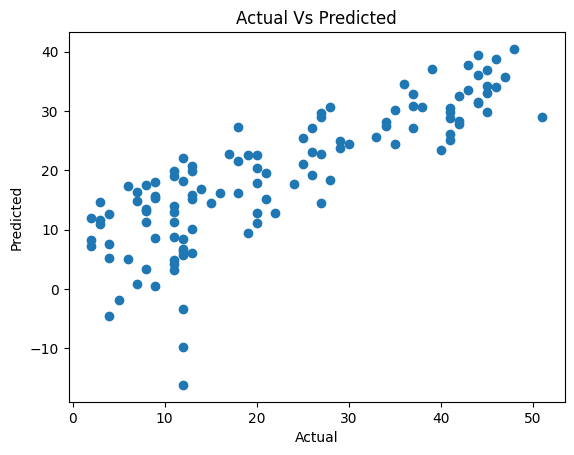

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted')
plt.show()

# **Get Future Predictions**

In [ ]:
X_new = df.sample(1)

In [ ]:
X_new

,Motor,Screw,Pgain,Vgain,Class
19,2,4,4,2,2


In [ ]:
X_new.shape

(1, 5)

In [ ]:
X_new = X_new.drop('Class', axis=1)

In [ ]:
X_new

,Motor,Screw,Pgain,Vgain
19,2,4,4,2


In [ ]:
X_new.shape

(1, 4)

In [ ]:
y_pred_new = lr.predict(X_new)

In [ ]:
y_pred_new

array([12.06199701])